In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")
import scipy.stats as st
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [4]:
# loading the data
days = pd.read_csv("day_approach_maskedID_timeseries.csv")
days.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


In [5]:
# shape of the data
days.shape

(42766, 73)

In [6]:
# datatypes of all features
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64
 13  km Z5-T1-T2.1   

In [7]:
# checking for null values
days.isnull().sum().value_counts()

0    73
dtype: int64

In [8]:
# checking for duplicate values
days.duplicated().sum()

0

In [9]:
days.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


In [10]:
days.tail(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
42756,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.24,0.64,0.22,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,70,1,2157
42757,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.72,0.71,0.35,...,0.0,0.3,0.0,0.0,0.58,0.67,0.24,70,1,2277
42758,1.0,11.4,5.1,0.0,0.0,0.0,0.0,0.64,0.70,0.35,...,0.0,1.0,0.0,0.0,0.52,0.60,0.39,70,1,2507
42759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,...,0.0,0.5,0.0,0.0,0.35,0.69,0.35,70,1,2573
42760,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.57,0.57,0.35,...,4.3,0.0,0.0,0.0,0.89,0.59,0.30,70,1,2641
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.54,0.22,0.30,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2143
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2286
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.94,0.88,0.11,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,71,1,2483
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.0,0.87,0.86,0.20,...,0.0,0.0,0.0,0.0,0.79,0.80,0.11,71,1,2647
42765,1.0,12.2,0.0,0.0,0.0,0.0,0.0,0.96,0.95,0.20,...,0.0,0.0,0.0,0.0,0.51,0.83,0.15,71,1,2673


In [11]:
# statistical summary
days.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
nr. sessions,42766.0,0.829561,0.580696,0.00,0.00,1.00,1.00,2.00
total km,42766.0,7.038187,7.473216,0.00,0.00,6.00,12.00,55.90
km Z3-4,42766.0,0.691381,2.317657,0.00,0.00,0.00,0.00,42.20
km Z5-T1-T2,42766.0,0.579930,1.811938,0.00,0.00,0.00,0.00,48.00
km sprinting,42766.0,0.073016,0.483480,0.00,0.00,0.00,0.00,40.00
strength training,42766.0,0.116237,0.326010,0.00,0.00,0.00,0.00,2.00
hours alternative,42766.0,0.163492,0.549664,0.00,0.00,0.00,0.00,10.22
perceived exertion,42766.0,0.247788,0.257262,-0.01,-0.01,0.16,0.44,1.00
perceived trainingSuccess,42766.0,0.349802,0.368300,-0.01,-0.01,0.26,0.72,1.00
perceived recovery,42766.0,0.195898,0.190321,-0.01,-0.01,0.16,0.30,1.00


We can see that in the perceived exertion, perceived training success and perceived recovery columns the min values are -0.01

### Replacing the value of -0.01 to 0.00 in the perceived exertion, perceived training success and perceived recovery columns

In [12]:
days = days.replace(-0.01, 0)
days.describe().T.head(20)

,count,mean,std,min,25%,50%,75%,max
nr. sessions,42766.0,0.829561,0.580696,0.0,0.0,1.00,1.00,2.00
total km,42766.0,7.038187,7.473216,0.0,0.0,6.00,12.00,55.90
km Z3-4,42766.0,0.691381,2.317657,0.0,0.0,0.00,0.00,42.20
km Z5-T1-T2,42766.0,0.579930,1.811938,0.0,0.0,0.00,0.00,48.00
km sprinting,42766.0,0.073016,0.483480,0.0,0.0,0.00,0.00,40.00
strength training,42766.0,0.116237,0.326010,0.0,0.0,0.00,0.00,2.00
hours alternative,42766.0,0.163492,0.549664,0.0,0.0,0.00,0.00,10.22
perceived exertion,42766.0,0.250471,0.254597,0.0,0.0,0.16,0.44,1.00
perceived trainingSuccess,42766.0,0.352485,0.365696,0.0,0.0,0.26,0.72,1.00
perceived recovery,42766.0,0.198581,0.187448,0.0,0.0,0.16,0.30,1.00


## Creating a dataset with the total of 7 days for all the features for EDA

In [13]:
all_nr_sessions = days[["nr. sessions", "nr. sessions.1", "nr. sessions.2", "nr. sessions.3", "nr. sessions.4",
                "nr. sessions.5", "nr. sessions.6"]]

all_total_km = days[["total km", "total km.1", "total km.2", "total km.3", "total km.4", "total km.5", "total km.6"]]

all_km_Z3_4 = days[["km Z3-4", "km Z3-4.1", "km Z3-4.2", "km Z3-4.3", "km Z3-4.4", "km Z3-4.5", "km Z3-4.6"]]

all_km_Z5_T1_T2 = days[["km Z5-T1-T2", "km Z5-T1-T2.1", "km Z5-T1-T2.2", "km Z5-T1-T2.3", "km Z5-T1-T2.4",
                         "km Z5-T1-T2.5", "km Z5-T1-T2.6"]]

all_km_sprinting = days[["km sprinting", "km sprinting.1", "km sprinting.2", "km sprinting.3", "km sprinting.4",
                          "km sprinting.5", "km sprinting.6"]]

all_strength_training = days[["strength training", "strength training.1", "strength training.2", "strength training.3",
                              "strength training.4", "strength training.5", "strength training.6"]]

all_hours_alternative = days[["hours alternative", "hours alternative.1", "hours alternative.2", "hours alternative.3",
                               "hours alternative.4", "hours alternative.5", "hours alternative.6"]]

all_perceived_exertion = days[["perceived exertion", "perceived exertion.1", "perceived exertion.2",
                                "perceived exertion.3", "perceived exertion.4", "perceived exertion.5",
                                "perceived exertion.6"]]

all_perceived_trainingSuccess = days[["perceived trainingSuccess", "perceived trainingSuccess.1",
                                       "perceived trainingSuccess.2", "perceived trainingSuccess.3",
                                       "perceived trainingSuccess.4", "perceived trainingSuccess.5",
                                       "perceived trainingSuccess.6"]]

all_perceived_recovery = days[["perceived recovery", "perceived recovery.1", "perceived recovery.2",
                                "perceived recovery.3", "perceived recovery.4", "perceived recovery.5",
                                 "perceived recovery.6"]]

In [14]:
total_dist = []
for i in range(len(all_total_km)):
    total_dist.append(all_total_km.iloc[i:i+1].sum(axis=1)[i])
all_total_km["total distance"] = total_dist

total_sessions = []
for i in range(len(all_nr_sessions)):
    total_sessions.append(all_nr_sessions.iloc[i:i+1].sum(axis=1)[i])
all_nr_sessions["total sessions"] = total_sessions

total_Z3_4 = []
for i in range(len(all_km_Z3_4)):
    total_Z3_4.append(all_km_Z3_4.iloc[i:i+1].sum(axis=1)[i])
all_km_Z3_4["total Z3-4 km"] = total_Z3_4

total_Z5_T1T2 = []
for i in range(len(all_km_Z5_T1_T2)):
    total_Z5_T1T2.append(all_km_Z5_T1_T2.iloc[i:i+1].sum(axis=1)[i])
all_km_Z5_T1_T2["total Z5_T1_T2 km"] = total_Z5_T1T2

total_sprint = []
for i in range(len(all_km_sprinting)):
    total_sprint.append(all_km_sprinting.iloc[i:i+1].sum(axis=1)[i])
all_km_sprinting["total km sprinting"] = total_sprint

total_strength_days = []
for i in range(len(all_strength_training)):
    total_strength_days.append(all_strength_training.iloc[i:i+1].sum(axis=1)[i])
all_strength_training["total strength training days"] = total_strength_days

total_alternate = []
for i in range(len(all_hours_alternative)):
    total_alternate.append(all_hours_alternative.iloc[i:i+1].sum(axis=1)[i])
all_hours_alternative["total hours alternative"] = total_alternate

tot_per_exer = []
for i in range(len(all_perceived_exertion)):
    tot_per_exer.append(all_perceived_exertion.iloc[i:i+1].sum(axis=1)[i])
all_perceived_exertion["total perceived exertion"] = tot_per_exer

tot_per_train_success = []
for i in range(len(all_perceived_trainingSuccess)):
    tot_per_train_success.append(all_perceived_trainingSuccess.iloc[i:i+1].sum(axis=1)[i])
all_perceived_trainingSuccess["total perceived training success"] = tot_per_train_success

tot_per_rec = []
for i in range(len(all_perceived_recovery)):
    tot_per_rec.append(all_perceived_recovery.iloc[i:i+1].sum(axis=1)[i])
all_perceived_recovery["total perceived recovery"] = tot_per_rec

In [15]:
tot_data = pd.DataFrame()
tot_data["total_no_of_sessions"] = total_sessions
tot_data["total_distance"] = total_dist
tot_data["total_distance_Z3_Z4"] = total_Z3_4
tot_data["total_distance_Z5_T1_T2"] = total_Z5_T1T2
tot_data["total_distance_sprinting"] = total_sprint
tot_data["total_strength_sessions"] = total_strength_days
tot_data["total_alternate_hours"] = total_alternate
tot_data["total_perceived_exertion"] = tot_per_exer
tot_data["total_perceived_training_success"] = tot_per_train_success
tot_data["total_perceived_recovery"] = tot_per_rec
tot_data["injury"] = days["injury"]
tot_data.head(10)

,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery,injury
0,5.0,22.2,10.0,0.6,1.2,2.0,2.08,0.50,0.0,0.85,0
1,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84,0
2,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84,0
3,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84,0
4,6.0,39.2,17.2,0.5,1.2,2.0,2.08,0.60,0.0,1.01,0
5,6.0,39.2,17.2,0.5,1.2,2.0,2.00,0.60,0.0,1.00,0
6,6.0,33.3,13.7,0.5,1.2,1.0,2.00,0.58,0.0,1.01,0
7,5.0,33.3,13.7,0.5,1.2,1.0,1.00,0.48,0.0,0.86,0
8,5.0,32.9,14.3,0.0,1.2,1.0,1.00,0.49,0.0,0.87,0
9,5.0,32.9,14.3,0.0,1.2,1.0,1.00,0.49,0.0,0.87,0


In [16]:
tot_data.tail()

,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery,injury
42761,4.0,59.5,0.0,0.0,0.0,0.0,0.0,1.68,2.62,1.27,1
42762,1.0,5.8,0.0,0.0,0.0,0.0,0.0,0.45,0.46,0.06,1
42763,3.0,38.3,0.0,0.0,0.0,0.0,0.0,2.23,2.07,0.67,1
42764,5.0,67.0,0.0,0.0,0.0,0.0,0.0,3.23,4.16,0.83,1
42765,4.0,45.0,0.0,0.0,0.0,0.0,0.0,2.83,3.20,1.29,1


In [17]:
# statistical summary
tot_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_no_of_sessions,42766.0,5.804845,2.486024,0.0,5.00,6.00,7.00,14.00
total_distance,42766.0,49.290401,36.381096,0.0,22.70,44.60,69.90,220.30
total_distance_Z3_Z4,42766.0,4.856489,6.953607,0.0,0.00,0.00,8.00,85.00
total_distance_Z5_T1_T2,42766.0,4.049684,5.559260,0.0,0.00,1.50,6.30,57.30
total_distance_sprinting,42766.0,0.508523,1.926598,0.0,0.00,0.00,0.50,68.20
total_strength_sessions,42766.0,0.814409,0.997998,0.0,0.00,1.00,1.00,9.00
total_alternate_hours,42766.0,1.140470,2.349752,0.0,0.00,0.00,1.50,52.50
total_perceived_exertion,42766.0,1.752084,1.229004,0.0,0.72,1.62,2.68,5.89
total_perceived_training_success,42766.0,2.465876,2.044665,0.0,0.00,2.90,4.20,6.98
total_perceived_recovery,42766.0,1.391506,0.938913,0.0,0.73,1.17,1.98,5.95


<AxesSubplot:>

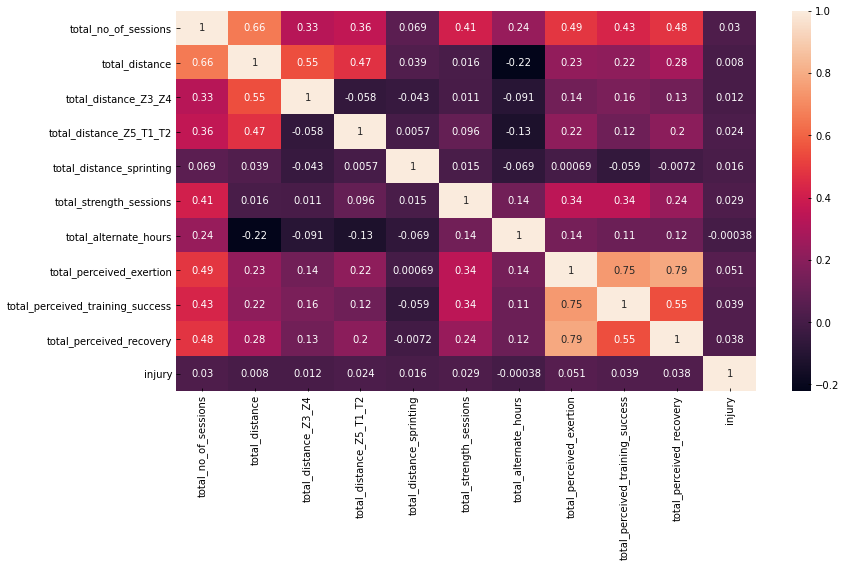

In [18]:
# correlation between the total features
plt.figure(figsize=(13,7))
sns.heatmap(tot_data.corr(), annot=True)

- We can see that total no. of sessions is highly positively correlated with total distance which is obvious as the distance will increase with no. of sessions.

- The perceived exertion, perceived training success and perceived recovery are positively correlated with each other.

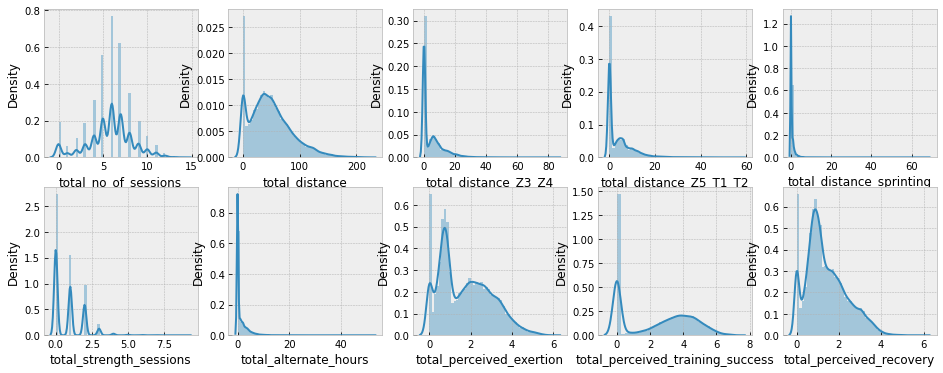

In [19]:
# distribution plots of all the total features 
plt.figure(figsize=(16,6))
i = 1
for feat in tot_data.drop("injury", axis=1).columns:
    plt.subplot(2,5,i)
    sns.distplot(tot_data[feat])
    i += 1

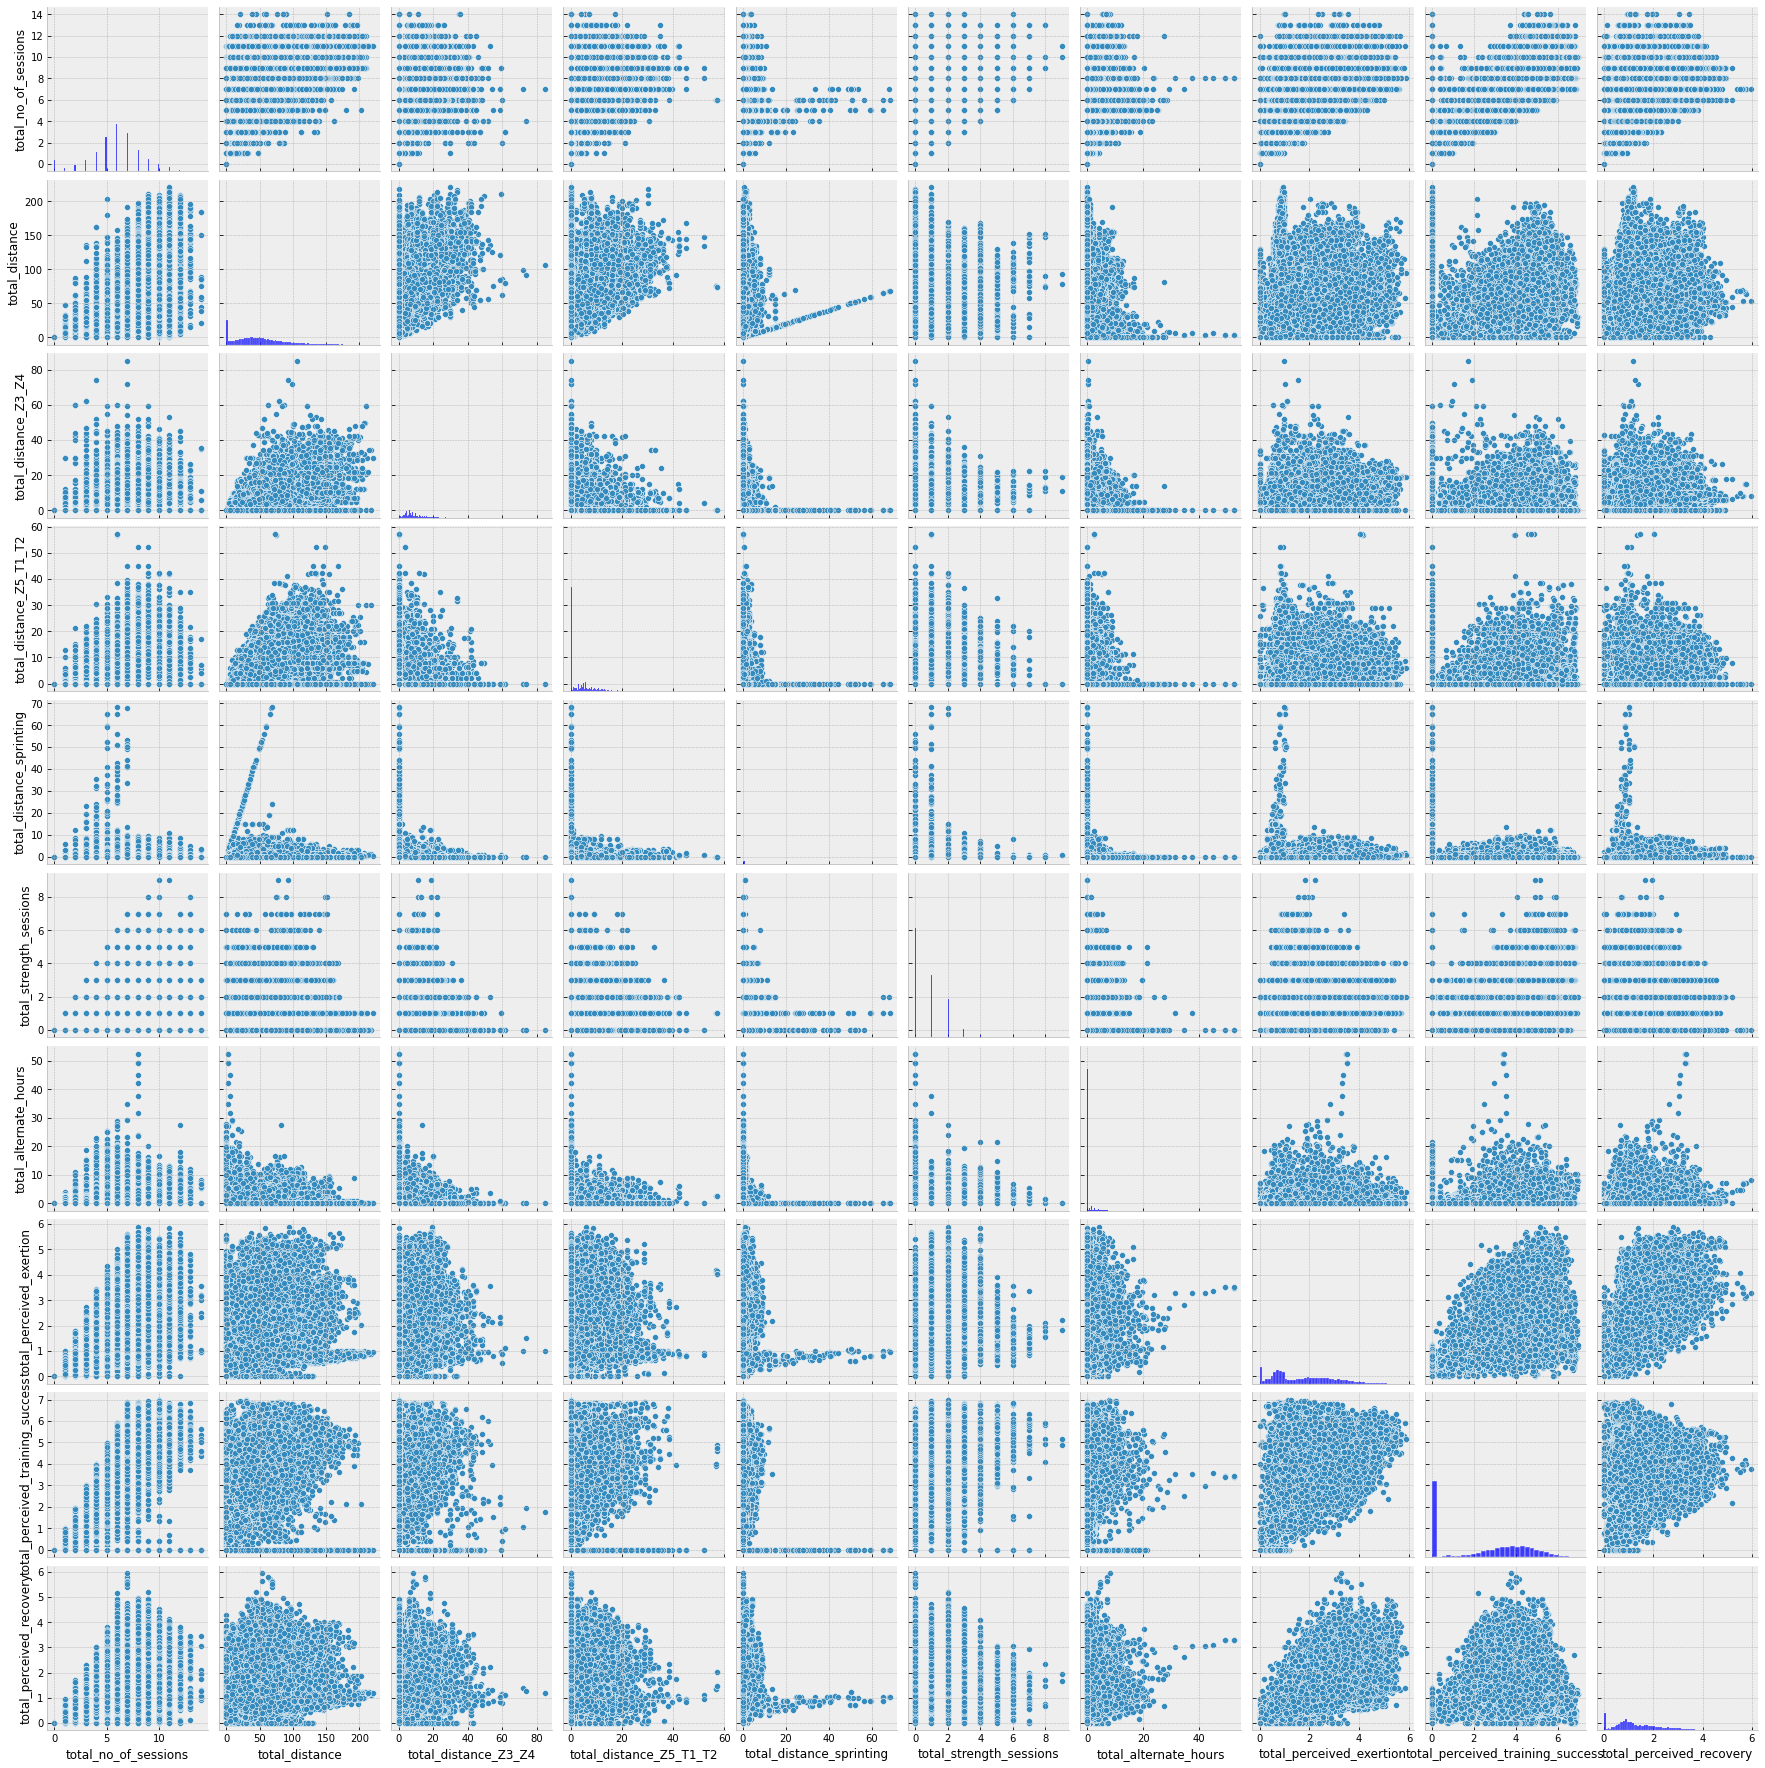

In [20]:
# pairplots of all total features with each other
sns.pairplot(tot_data.drop("injury", axis=1))

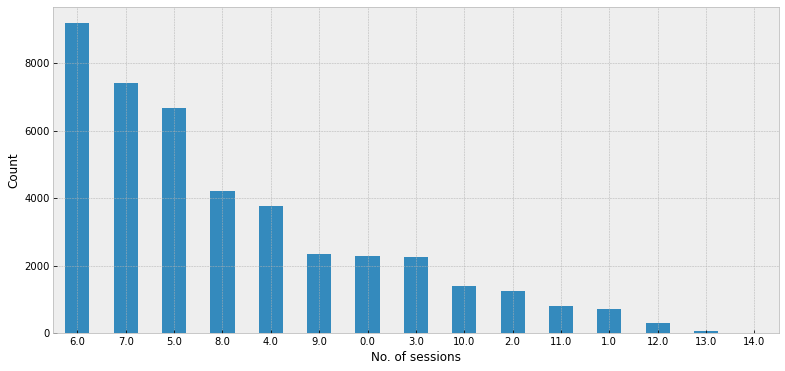

In [21]:
# total number of sessions
plt.figure(figsize=(13,6))
tot_data["total_no_of_sessions"].value_counts().plot(kind="bar", rot=0)
plt.xlabel("No. of sessions")
plt.ylabel("Count")
plt.show()

Most of the runners trained for 6 sessions in a week.

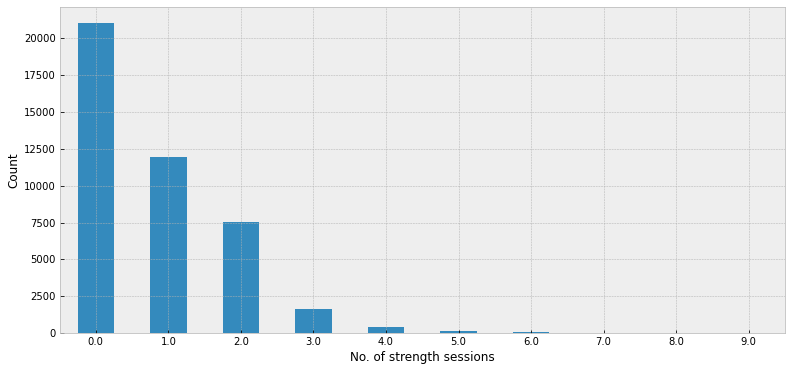

In [22]:
# total number of strength sessions
plt.figure(figsize=(13,6))
tot_data["total_strength_sessions"].value_counts().plot(kind="bar", rot=0)
plt.xlabel("No. of strength sessions")
plt.ylabel("Count")
plt.show()

We can see that most of the runners do not do any strength training

## Bivariate analysis-

### Total number of sessions vs injury

In [23]:
tot_data.groupby("injury").describe()["total_no_of_sessions"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,5.796198,2.491020,0.0,5.0,6.0,7.0,14.0
1,583.0,6.430532,1.997824,0.0,5.0,6.0,8.0,13.0


We can see that the mean of total number of sessions (6.43) for injured cases is slightly higher than that of non-injured cases (5.796).

In [24]:
def box_density(target, feature):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=tot_data[target], y=tot_data[feature])
    plt.subplot(1,2,2)
    tot_data.groupby(target)[feature].plot(kind="density")
    plt.legend()
    plt.show

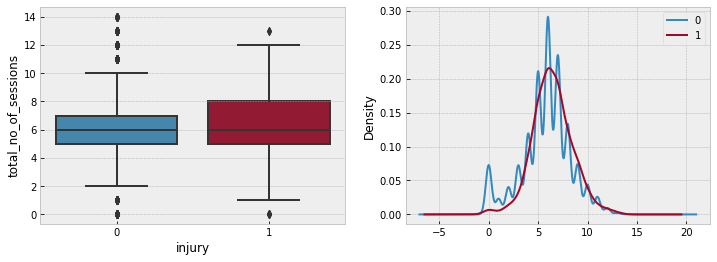

In [25]:
# box and desnsity plots
box_density("injury", "total_no_of_sessions")

### Statistical tests

In [26]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_no_of_sessions"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_no_of_sessions"]))

ShapiroResult(statistic=0.9683926105499268, pvalue=6.93571367005319e-10)
ShapiroResult(statistic=0.9615910649299622, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of no. of sessions of injured = Population median of no. of sessions of non-injured

H1: Population median of no. of sessions of injured != Population median of no. of sessions of non-injured

In [27]:
sess_inj = tot_data[tot_data["injury"]==1]["total_no_of_sessions"]
sess_non_inj = tot_data[tot_data["injury"]==0]["total_no_of_sessions"]
st.mannwhitneyu(sess_inj, sess_non_inj)

MannwhitneyuResult(statistic=10659984.5, pvalue=1.1565082236056332e-08)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total number of sessions for injured cases is not equal to that of non-injured cases.

### Total distance vs injury

In [28]:
tot_data.groupby("injury").describe()["total_distance"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,49.256262,36.461267,0.0,22.5,44.5,70.0,220.3
1,583.0,51.760549,29.940071,0.0,30.7,48.7,67.9,174.0


We can see that both the mean and median values are higher for injured cases.

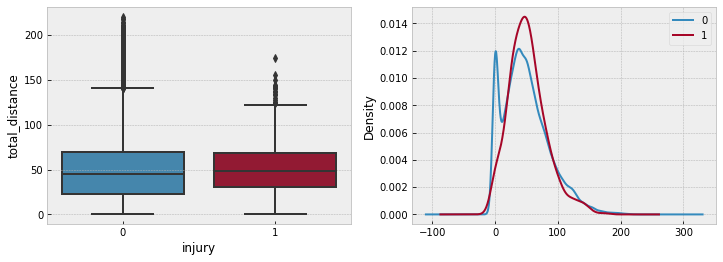

In [29]:
box_density("injury", "total_distance")

In [30]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_distance"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_distance"]))

ShapiroResult(statistic=0.962967574596405, pvalue=5.959707033431627e-11)
ShapiroResult(statistic=0.9463712573051453, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total distance of injured = Population median of total distance of non-injured

H1: Population median of total distance of injured != Population median of total distance of non-injured

In [31]:
dist_inj = tot_data[tot_data["injury"]==1]["total_distance"]
dist_non_inj = tot_data[tot_data["injury"]==0]["total_distance"]
st.mannwhitneyu(dist_inj, dist_non_inj)

MannwhitneyuResult(statistic=11377382.0, pvalue=0.0009492528348117449)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total distance for injured cases is not equal to that of non-injured cases.

### Total distance Z3 - Z4 vs injury

In [32]:
tot_data.groupby("injury").describe()["total_distance_Z3_Z4"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,4.846881,6.954614,0.0,0.0,0.0,8.0,85.0
1,583.0,5.551630,6.850484,0.0,0.0,3.7,9.0,35.4


The mean is higher for injured cases

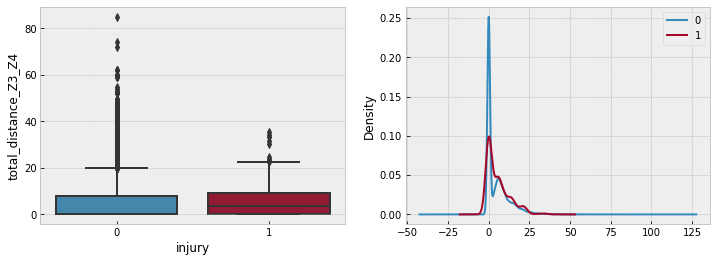

In [33]:
box_density("injury", "total_distance_Z3_Z4")

In [34]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_distance_Z3_Z4"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_distance_Z3_Z4"]))

ShapiroResult(statistic=0.8040274381637573, pvalue=5.741831334430438e-26)
ShapiroResult(statistic=0.7349622249603271, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total distance Z3-Z4 of injured = Population median of total distance Z3-Z4 non-injured

H1: Population median of total distance Z3-Z4 of injured != Population median of total distance Z3-Z4 of non-injured

In [35]:
Z3_Z4_inj = tot_data[tot_data["injury"]==1]["total_distance_Z3_Z4"]
Z3_Z4_non_inj = tot_data[tot_data["injury"]==0]["total_distance_Z3_Z4"]
st.mannwhitneyu(Z3_Z4_inj, Z3_Z4_non_inj)

MannwhitneyuResult(statistic=11390465.0, pvalue=0.0005004742082946147)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total distance Z3-Z4 for injured cases is not equal to that of non-injured cases.

### Total distance Z5-T1-T2 vs injury

In [36]:
tot_data.groupby("injury").describe()["total_distance_Z5_T1_T2"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,4.034239,5.553869,0.0,0.0,1.5,6.30,57.3
1,583.0,5.167238,5.833716,0.0,0.0,4.0,8.15,32.3


Both mean and median are higher for injured cases.

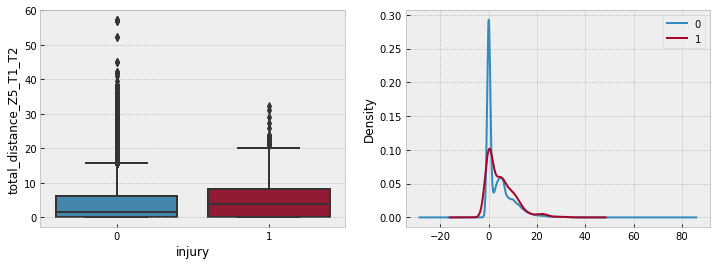

In [37]:
box_density("injury", "total_distance_Z5_T1_T2")

In [38]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_distance_Z5_T1_T2"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_distance_Z5_T1_T2"]))

ShapiroResult(statistic=0.8329615592956543, pvalue=3.171563599051786e-24)
ShapiroResult(statistic=0.7524892687797546, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total distance Z5-T1_T2 of injured = Population median of total distance Z5-T1-T2 non-injured

H1: Population median of total distance Z5-T1-T2 of injured != Population median of total distance Z5-T1-T2 of non-injured

In [39]:
Z5_T1_T2_inj = tot_data[tot_data["injury"]==1]["total_distance_Z5_T1_T2"]
Z5_T1_T2_non_inj = tot_data[tot_data["injury"]==0]["total_distance_Z5_T1_T2"]
st.mannwhitneyu(Z5_T1_T2_inj, Z5_T1_T2_non_inj)

MannwhitneyuResult(statistic=10631058.5, pvalue=1.39769683224011e-09)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total distance Z5_T1_T2 for injured cases is not equal to that of non-injured cases.

### Total perceived exertion vs injury

In [40]:
tot_data.groupby("injury").describe()["total_perceived_exertion"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,1.744734,1.227795,0.0,0.720,1.61,2.670,5.89
1,583.0,2.283859,1.200488,0.0,1.085,2.36,3.145,5.15


Both mean and median are higher for injured cases.

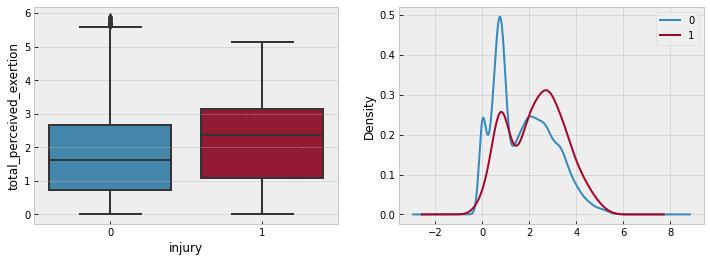

In [41]:
box_density("injury", "total_perceived_exertion")

In [42]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_perceived_exertion"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_perceived_exertion"]))

ShapiroResult(statistic=0.9736281633377075, pvalue=9.622473484682814e-09)
ShapiroResult(statistic=0.951794445514679, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total perceived exertion of injured = Population median of total perceived exertion non-injured

H1: Population median of total perceived exertion of injured != Population median of total perceived exertion of non-injured

In [43]:
per_exer_inj = tot_data[tot_data["injury"]==1]["total_perceived_exertion"]
per_exer_non_inj = tot_data[tot_data["injury"]==0]["total_perceived_exertion"]
st.mannwhitneyu(per_exer_inj, per_exer_non_inj)

MannwhitneyuResult(statistic=9144210.5, pvalue=8.78119920144311e-27)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total perceived exertion for injured cases is not equal to that of non-injured cases.

### Total perceived training success vs injury

In [44]:
tot_data.groupby("injury").describe()["total_perceived_training_success"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,2.456621,2.045688,0.0,0.000,2.89,4.200,6.98
1,583.0,3.135557,1.851752,0.0,2.275,3.60,4.495,6.78


Both mean and median are higher for injured cases.

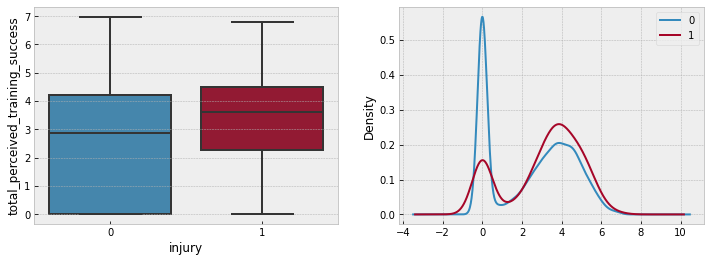

In [45]:
box_density("injury", "total_perceived_training_success")

In [46]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_perceived_training_success"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_perceived_training_success"]))

ShapiroResult(statistic=0.8943628072738647, pvalue=1.3861925016906316e-19)
ShapiroResult(statistic=0.8684770464897156, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total perceived training success of injured = Population median of total perceived training success non-injured

H1: Population median of total perceived training success of injured != Population median of total perceived training success of non-injured

In [47]:
per_train_succ_inj = tot_data[tot_data["injury"]==1]["total_perceived_training_success"]
per_train_succ_non_inj = tot_data[tot_data["injury"]==0]["total_perceived_training_success"]
st.mannwhitneyu(per_train_succ_inj, per_train_succ_non_inj)

MannwhitneyuResult(statistic=10069234.0, pvalue=8.117783061518219e-15)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total perceived training success for injured cases is not equal to that of non-injured cases.

### Total peceived recovery vs injury

In [48]:
tot_data.groupby("injury").describe()["total_perceived_recovery"]

,count,mean,std,min,25%,50%,75%,max
injury,,,,,,,,
0,42183.0,1.387275,0.938623,0.0,0.730,1.17,1.970,5.95
1,583.0,1.697684,0.909631,0.0,0.985,1.59,2.275,5.20


Both mean and median are slightly higher for injured cases.

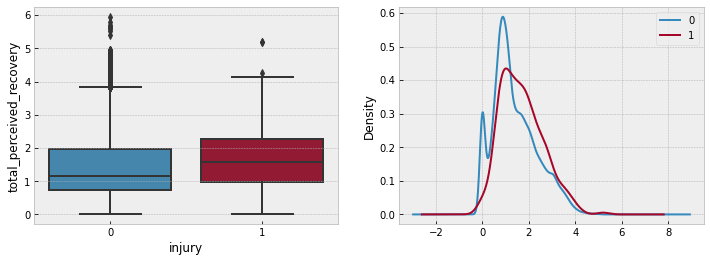

In [49]:
box_density("injury", "total_perceived_recovery")

In [50]:
# test for normality
print(st.shapiro(tot_data[tot_data["injury"]==1]["total_perceived_recovery"]))
print(st.shapiro(tot_data[tot_data["injury"]==0]["total_perceived_recovery"]))

ShapiroResult(statistic=0.9689982533454895, pvalue=9.268189549160866e-10)
ShapiroResult(statistic=0.9529839754104614, pvalue=0.0)


Since, pvalues < 0.05 for both cases, they are not following normal distributions. Hence, proceeding with non-parametric test.

Mann-Whitney U test -

H0: Population median of total perceived recovery of injured = Population median of total perceived recovery non-injured

H1: Population median of total perceived recovery of injured != Population median of total perceived recovery of non-injured

In [51]:
per_rec_inj = tot_data[tot_data["injury"]==1]["total_perceived_recovery"]
per_rec_non_inj = tot_data[tot_data["injury"]==0]["total_perceived_recovery"]
st.mannwhitneyu(per_rec_inj, per_rec_non_inj)

MannwhitneyuResult(statistic=9781911.5, pvalue=9.891431877760295e-18)

Since, pvalue < 0.05, we accept H1. Hence, according to statistical test, the median of total perceived recovery for injured cases is not equal to that of non-injured cases.

## Adding the 7 days total of all features to the main dataset

In [52]:
data = days.copy()

In [53]:
data["total_no_of_sessions"] = tot_data["total_no_of_sessions"]
data["total_distance"] = tot_data["total_distance"]
data["total_distance_Z3_Z4"] = tot_data["total_distance_Z3_Z4"]
data["total_distance_Z5_T1_T2"] = tot_data["total_distance_Z5_T1_T2"]
data["total_distance_sprinting"] = tot_data["total_distance_sprinting"]
data["total_strength_sessions"] = tot_data["total_strength_sessions"]
data["total_alternate_hours"] = tot_data["total_alternate_hours"]
data["total_perceived_exertion"] = tot_data["total_perceived_exertion"]
data["total_perceived_training_success"] = tot_data["total_perceived_training_success"]
data["total_perceived_recovery"] = tot_data["total_perceived_recovery"]

In [54]:
data.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.0,0.18,...,5.0,22.2,10.0,0.6,1.2,2.0,2.08,0.50,0.0,0.85
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.0,0.17,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.0,0.18,...,6.0,39.2,17.2,0.5,1.2,2.0,2.08,0.60,0.0,1.01


In [55]:
data.tail()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
42761,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.54,0.22,0.30,...,4.0,59.5,0.0,0.0,0.0,0.0,0.0,1.68,2.62,1.27
42762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,...,1.0,5.8,0.0,0.0,0.0,0.0,0.0,0.45,0.46,0.06
42763,1.0,10.0,0.0,0.0,0.0,0.0,0.0,0.94,0.88,0.11,...,3.0,38.3,0.0,0.0,0.0,0.0,0.0,2.23,2.07,0.67
42764,1.0,15.1,0.0,0.0,0.0,0.0,0.0,0.87,0.86,0.20,...,5.0,67.0,0.0,0.0,0.0,0.0,0.0,3.23,4.16,0.83
42765,1.0,12.2,0.0,0.0,0.0,0.0,0.0,0.96,0.95,0.20,...,4.0,45.0,0.0,0.0,0.0,0.0,0.0,2.83,3.20,1.29


## Target feature composition

In [56]:
data["injury"].value_counts()

0    42183
1      583
Name: injury, dtype: int64

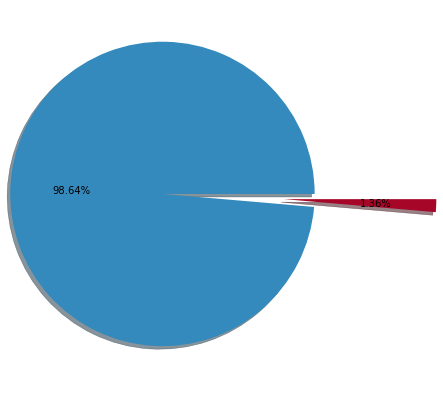

In [57]:
plt.figure(figsize=(13,7))
plt.pie(data["injury"].value_counts(), autopct="%.2f%%", explode=[0.4,0.4], shadow=True)
plt.show()

The target feature is highly imbalanced with majority class(0) 98.64% and minority class(1) 1.36%.

We will first try to build classification models using the target variable as it is without balancing.

## Model building

In [58]:
# defining independent features and target feature
X = data.drop(["injury", "Athlete ID", "Date"], axis=1)
y = data["injury"]

In [59]:
X.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.0,0.18,...,5.0,22.2,10.0,0.6,1.2,2.0,2.08,0.50,0.0,0.85
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.0,0.17,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.0,0.18,...,6.0,39.2,17.2,0.5,1.2,2.0,2.08,0.60,0.0,1.01


### Scaling the data using Standard Scalar

In [60]:
X_sc = X.copy()
std_sc = StandardScaler()
for i in X_sc.columns:
    X_sc[i] = std_sc.fit_transform(X_sc[i].values.reshape(-1,1))
X_sc.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
0,0.293512,-0.165685,-0.298314,0.011076,2.331009,-0.356549,-0.297443,-0.551746,-0.963887,-0.099129,...,-0.323752,-0.744637,0.739698,-0.620537,0.358915,1.187983,0.399847,-1.018791,-1.206019,-0.576744
1,-1.428581,-0.941799,-0.298314,-0.320065,-0.151023,-0.356549,-0.297443,-0.983806,-0.963887,-1.059407,...,-0.323752,-0.761129,0.739698,-0.638525,0.358915,1.187983,0.399847,-1.026928,-1.206019,-0.587395
2,0.293512,-0.941799,-0.298314,-0.320065,-0.151023,2.710874,-0.297443,-0.591024,-0.963887,-0.152478,...,-0.323752,-0.761129,0.739698,-0.638525,0.358915,1.187983,0.399847,-1.026928,-1.206019,-0.587395
3,-1.428581,-0.941799,-0.298314,-0.320065,-0.151023,-0.356549,-0.297443,-0.983806,-0.963887,-1.059407,...,-0.323752,-0.761129,0.739698,-0.638525,0.358915,1.187983,0.399847,-1.026928,-1.206019,-0.587395
4,0.293512,-0.941799,-0.298314,-0.320065,-0.151023,-0.356549,1.667417,-0.669580,-0.963887,-0.099129,...,0.078502,-0.277356,1.775144,-0.638525,0.358915,1.187983,0.399847,-0.937423,-1.206019,-0.406332


### Splitting the data for training and splitting

In [61]:
# giving a train size of 80%
xtrain, xtest, ytrain, ytest = train_test_split(X_sc, y, test_size=0.2, stratify=y, random_state=99)

In [62]:
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

xtrain shape: (34212, 80)
xtest shape: (8554, 80)
ytrain shape: (34212,)
ytest shape: (8554,)


In [63]:
print(ytrain.value_counts())

0    33746
1      466
Name: injury, dtype: int64


## Classification models

### KNN classifier

In [64]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)

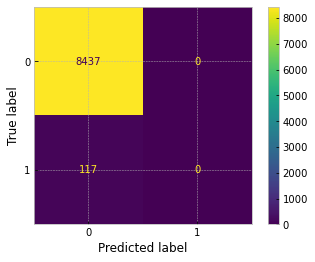

In [65]:
plot_confusion_matrix(knn, xtest, ytest)

In [66]:
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8437
           1       0.00      0.00      0.00       117

    accuracy                           0.99      8554
   macro avg       0.49      0.50      0.50      8554
weighted avg       0.97      0.99      0.98      8554



### Decision Tree Classifier

In [67]:
dtc = DecisionTreeClassifier(random_state=99)
dtc.fit(xtrain, ytrain)
ypred_dtc = dtc.predict(xtest)

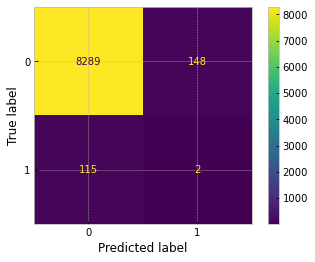

In [68]:
plot_confusion_matrix(dtc, xtest, ytest)

In [69]:
print(classification_report(ytest, ypred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8437
           1       0.01      0.02      0.01       117

    accuracy                           0.97      8554
   macro avg       0.50      0.50      0.50      8554
weighted avg       0.97      0.97      0.97      8554



- We can see that in both KNN model (nearest neighbor based) and Decision Tree model (tree based), the recall, precision and f1 scores of the minority class are really low.

- That means there is too much bias towards majority class and there is not sufficient amount of minority class data for the model to learn.

- We can resolve this by either downsampling or oversampling

- Since our data is highly imbalanced in the ratio **1.36:98.64**, if we downsample the majority class to match the minority class, we would lose a lot of key data.

- Hence, we will oversample the minority class so that the model gets more minority class data to learn.

### Using SMOTE to oversample the minority class

We will only increase the minority class in the ratio of **5:95** compared to majority class. This is because if we match the minority class with the majority class, there will be too many synthetic samples and may lead to overfitting the model.  

In [70]:
sm = SMOTE(random_state=99, sampling_strategy=5/95)

In [71]:
X_over, y_over = sm.fit_resample(X, y)
data_bal = pd.concat([pd.DataFrame(y_over), pd.DataFrame(X_over)], axis=1)

In [72]:
data_bal.head()

,injury,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
0,0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.0,...,5.0,22.2,10.0,0.6,1.2,2.0,2.08,0.50,0.0,0.85
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.0,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,...,5.0,21.6,10.0,0.5,1.2,2.0,2.08,0.49,0.0,0.84
4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.0,...,6.0,39.2,17.2,0.5,1.2,2.0,2.08,0.60,0.0,1.01


In [73]:
data_bal.shape

(44403, 81)

In [74]:
data_bal["injury"].value_counts()

0    42183
1     2220
Name: injury, dtype: int64

In [75]:
xtrain_over, xtest, ytrain_over, ytest = train_test_split(X_over, y_over, random_state=99)

In [76]:
print("xtrain_over shape:", xtrain_over.shape)
print("xtest_over shape:", xtest.shape)
print("ytrain_over shape:", ytrain_over.shape)
print("ytest_over shape:", ytest.shape)

xtrain_over shape: (33302, 80)
xtest_over shape: (11101, 80)
ytrain_over shape: (33302,)
ytest_over shape: (11101,)


In [77]:
ytrain_over.value_counts()

0    31603
1     1699
Name: injury, dtype: int64

In [78]:
for i in xtrain_over.columns:
    xtrain_over[i] = std_sc.fit_transform(xtrain_over[i].values.reshape(-1,1))
for i in xtest.columns:
    xtest[i] = std_sc.fit_transform(xtest[i].values.reshape(-1,1))

In [79]:
xtrain_over.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
10040,0.284234,0.792416,-0.299253,1.308035,-0.152664,-0.360455,-0.299041,1.512701,1.164512,1.007788,...,0.876245,1.366975,-0.706298,0.882393,-0.280291,0.176174,0.440926,0.226478,1.220442,0.888969
7958,0.284234,-0.949523,-0.299253,-0.326561,-0.152664,2.716282,-0.299041,0.963125,0.972102,0.206316,...,0.472183,0.000342,-0.706298,2.495477,-0.280291,1.180923,0.762658,1.292151,0.979714,0.420208
11725,0.284234,-0.949523,-0.299253,-0.326561,-0.152664,2.716282,-0.299041,1.983766,1.769231,-1.076037,...,0.472183,0.187703,-0.706298,-0.175074,-0.280291,0.176174,-0.489954,2.740165,1.790327,0.398901
26387,0.284234,-0.547537,-0.299253,-0.326561,-0.152664,-0.360455,-0.299041,0.295783,1.054564,-0.167703,...,0.068121,-0.203551,-0.706298,1.384241,0.385348,0.176174,-0.489954,1.617548,0.802853,-0.219011
27503,0.284234,0.658421,-0.299253,-0.326561,-0.152664,-0.360455,-0.299041,0.217272,1.164512,0.206316,...,0.876245,-0.052009,0.238339,-0.730692,-0.280291,1.180923,0.368000,0.315962,1.416954,0.057984


In [80]:
xtest.head()

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,total_no_of_sessions,total_distance,total_distance_Z3_Z4,total_distance_Z5_T1_T2,total_distance_sprinting,total_strength_sessions,total_alternate_hours,total_perceived_exertion,total_perceived_training_success,total_perceived_recovery
41879,0.294601,1.172489,4.056977,-0.326571,-0.164226,-0.357658,-0.292446,1.248688,0.444333,-0.154848,...,0.478686,0.706409,2.018333,0.124346,-0.249183,1.199387,-0.477434,0.622713,1.195969,-0.133389
31525,0.294601,1.077508,-0.299707,-0.326571,-0.164226,-0.357658,-0.292446,-0.283431,1.046584,0.113607,...,0.069224,0.133479,0.039483,0.343591,-0.249183,-0.836479,-0.477434,0.180374,1.072865,-0.262630
38318,-1.439928,-0.957806,-0.299707,-0.326571,-0.164226,-0.357658,-0.292446,-0.990563,-0.979169,-1.067595,...,-2.387554,-1.381293,-0.695519,-0.752634,-0.249183,-0.836479,-0.477434,-1.457918,-1.236571,-1.511953
16076,-1.439928,-0.957806,-0.299707,-0.326571,-0.164226,-0.357658,-0.292446,-0.990563,-0.979169,-1.067595,...,-0.749702,-0.665829,-0.695519,0.124346,-0.249183,0.181454,-0.477434,-1.031962,-1.236571,-0.747281
28887,-1.439928,-0.957806,-0.299707,-0.326571,-0.164226,-0.357658,-0.292446,-0.990563,-0.979169,-1.067595,...,-2.387554,-1.381293,-0.695519,-0.752634,-0.249183,-0.836479,-0.477434,-1.457918,-1.236571,-1.511953


### KNN classifier

In [81]:
knn = KNeighborsClassifier()
knn.fit(xtrain_over, ytrain_over)
ypred_knn = knn.predict(xtest)

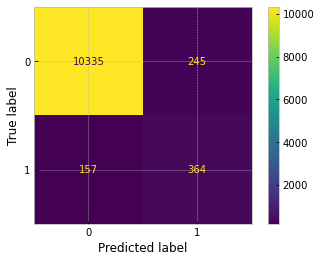

In [82]:
plot_confusion_matrix(knn, xtest, ytest, values_format="d")

In [83]:
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10580
           1       0.60      0.70      0.64       521

    accuracy                           0.96     11101
   macro avg       0.79      0.84      0.81     11101
weighted avg       0.97      0.96      0.97     11101



We can see that there is a significant improvement in the precision, recall and f1 scores of the minority class.

### Decision Tree Classifier

In [84]:
dtc = DecisionTreeClassifier(random_state=99)
dtc.fit(xtrain_over, ytrain_over)
ypred_dtc = dtc.predict(xtest)

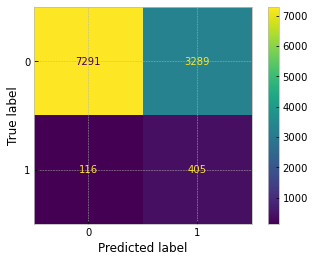

In [85]:
plot_confusion_matrix(dtc, xtest, ytest)

In [86]:
print(classification_report(ytest, ypred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     10580
           1       0.11      0.78      0.19       521

    accuracy                           0.69     11101
   macro avg       0.55      0.73      0.50     11101
weighted avg       0.94      0.69      0.78     11101



### Logistic Regression

In [87]:
lgr = LogisticRegression(random_state=99)
lgr.fit(xtrain_over, ytrain_over)
ypred_lgr = lgr.predict(xtest)

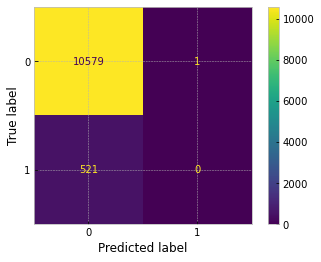

In [88]:
plot_confusion_matrix(lgr, xtest, ytest)

In [89]:
print(classification_report(ytest, ypred_lgr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     10580
           1       0.00      0.00      0.00       521

    accuracy                           0.95     11101
   macro avg       0.48      0.50      0.49     11101
weighted avg       0.91      0.95      0.93     11101



### Naive Bayes classification

In [90]:
gnb = GaussianNB()
gnb.fit(xtrain_over, ytrain_over)
ypred_gnb = gnb.predict(xtest)

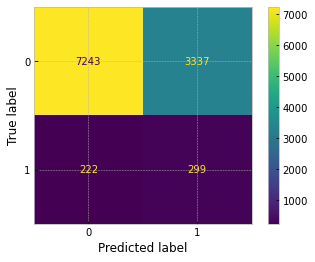

In [91]:
plot_confusion_matrix(gnb, xtest, ytest)

In [92]:
print(classification_report(ytest, ypred_gnb))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     10580
           1       0.08      0.57      0.14       521

    accuracy                           0.68     11101
   macro avg       0.53      0.63      0.47     11101
weighted avg       0.93      0.68      0.77     11101



## Ensemble models

### AdaBoost Classifier

In [93]:
adb = AdaBoostClassifier(random_state=99)
adb.fit(xtrain_over, ytrain_over)
ypred_adb = adb.predict(xtest)

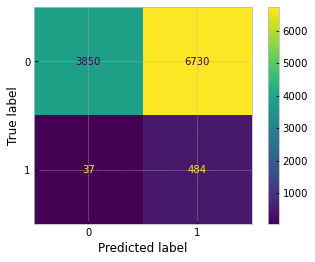

In [94]:
plot_confusion_matrix(adb, xtest, ytest)

In [95]:
print(classification_report(ytest, ypred_adb))

              precision    recall  f1-score   support

           0       0.99      0.36      0.53     10580
           1       0.07      0.93      0.13       521

    accuracy                           0.39     11101
   macro avg       0.53      0.65      0.33     11101
weighted avg       0.95      0.39      0.51     11101



### Bagging Classifier

In [96]:
bgc = BaggingClassifier(random_state=99)
bgc.fit(xtrain_over, ytrain_over)
ypred_bgc = bgc.predict(xtest)

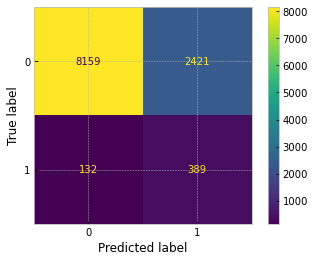

In [97]:
plot_confusion_matrix(bgc, xtest, ytest)

In [98]:
print(classification_report(ytest, ypred_bgc))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     10580
           1       0.14      0.75      0.23       521

    accuracy                           0.77     11101
   macro avg       0.56      0.76      0.55     11101
weighted avg       0.94      0.77      0.84     11101



### Gradient Boosting Classifier

In [99]:
gbc = GradientBoostingClassifier(random_state=99)
gbc.fit(xtrain_over, ytrain_over)
ypred_gbc = gbc.predict(xtest)

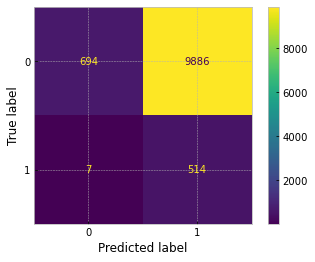

In [100]:
plot_confusion_matrix(gbc, xtest, ytest)

In [101]:
print(classification_report(ytest, ypred_gbc))

              precision    recall  f1-score   support

           0       0.99      0.07      0.12     10580
           1       0.05      0.99      0.09       521

    accuracy                           0.11     11101
   macro avg       0.52      0.53      0.11     11101
weighted avg       0.95      0.11      0.12     11101



### RandomForest Classifier

In [102]:
rfc = RandomForestClassifier(random_state=99)
rfc.fit(xtrain_over, ytrain_over)
ypred_rfc = rfc.predict(xtest)

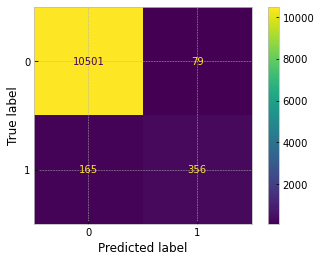

In [103]:
plot_confusion_matrix(rfc, xtest, ytest)

In [104]:
print(classification_report(ytest, ypred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10580
           1       0.82      0.68      0.74       521

    accuracy                           0.98     11101
   macro avg       0.90      0.84      0.87     11101
weighted avg       0.98      0.98      0.98     11101



### XGBoost Classifier

In [105]:
xgb = XGBClassifier(random_state=99)
xgb.fit(xtrain_over, ytrain_over)
ypred_xgb = xgb.predict(xtest)

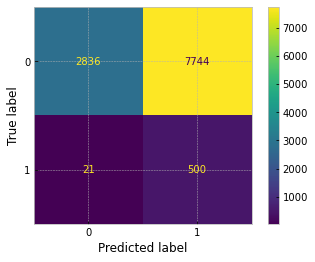

In [106]:
plot_confusion_matrix(xgb, xtest, ytest)

In [107]:
print(classification_report(ytest, ypred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.27      0.42     10580
           1       0.06      0.96      0.11       521

    accuracy                           0.30     11101
   macro avg       0.53      0.61      0.27     11101
weighted avg       0.95      0.30      0.41     11101



Comparing all the classification reports, we will select Random Forest Classifier as our model and further hyperparameter tune it.

### Hyperparamter tuning

In [111]:
params = [{"n_estimators":range(60,160,20),"max_features":["sqrt","log2"], "criterion":["gini", "entropy"]}]

In [112]:
clf = RandomizedSearchCV(rfc, params, cv=5)

In [113]:
clf.fit(xtrain_over, ytrain_over)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_features': ['sqrt', 'log2'],
                                         'n_estimators': range(60, 160, 20)}])

In [114]:
clf.best_params_

{'n_estimators': 140, 'max_features': 'sqrt', 'criterion': 'gini'}

In [115]:
clf.best_score_

0.9756170447583148

In [122]:
# appplying best parameters to our model
rfc_hyp = RandomForestClassifier(n_estimators=140, max_features="sqrt", criterion="gini",
                                 oob_score=True, random_state=99)

In [123]:
rfc_hyp.fit(xtrain_over, ytrain_over)

RandomForestClassifier(max_features='sqrt', n_estimators=140, oob_score=True,
                       random_state=99)

In [124]:
ypred_rfchyp = rfc_hyp.predict(xtest)

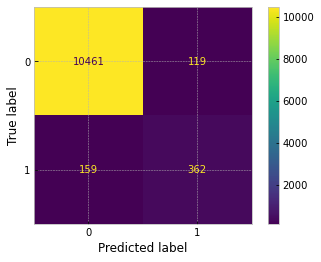

In [125]:
plot_confusion_matrix(rfc_hyp, xtest, ytest, values_format="d")

In [126]:
print(classification_report(ytest, ypred_rfchyp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10580
           1       0.75      0.69      0.72       521

    accuracy                           0.97     11101
   macro avg       0.87      0.84      0.85     11101
weighted avg       0.97      0.97      0.97     11101



In [127]:
rfc_hyp.oob_score_

0.9782595639901508

### ROC_AUC Curve

In [131]:
prob = rfc_hyp.predict_proba(xtest)[:,1]

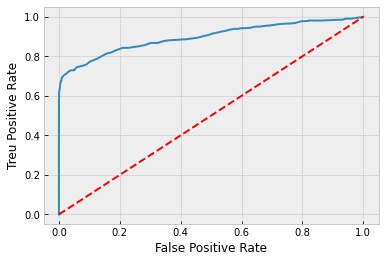

In [133]:
fpr, tpr, threshold = roc_curve(ytest, prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], color="r", ls="--")
plt.xlabel("False Positive Rate")
plt.ylabel("Treu Positive Rate")
plt.show()

In [134]:
# area under curve 
roc_auc_score(ytest, prob)

0.8969032215929087

### Feature importance

In [135]:
rfc_hyp.feature_importances_

array([0.0162371 , 0.01281861, 0.0046214 , 0.00994508, 0.00881866,
       0.00944975, 0.00352077, 0.01493367, 0.01899438, 0.0135972 ,
       0.01489019, 0.01043462, 0.00460368, 0.00482393, 0.00327808,
       0.02875836, 0.005609  , 0.0131528 , 0.01396146, 0.01222977,
       0.01632552, 0.01266013, 0.00893702, 0.00676723, 0.00744636,
       0.00854669, 0.00477847, 0.01506458, 0.01614604, 0.01397263,
       0.01577116, 0.0134444 , 0.00507642, 0.0070215 , 0.00598692,
       0.0143521 , 0.00387788, 0.01592013, 0.01705711, 0.01373895,
       0.02207194, 0.01288003, 0.00567656, 0.00689084, 0.0064732 ,
       0.00922685, 0.00374426, 0.01393915, 0.01514364, 0.01425466,
       0.01303667, 0.01326543, 0.00749821, 0.01022572, 0.00553119,
       0.00850629, 0.00307541, 0.01283278, 0.01375124, 0.01344131,
       0.01920796, 0.01250747, 0.00572699, 0.00740269, 0.01428716,
       0.01724503, 0.00594542, 0.01579253, 0.02001006, 0.01512936,
       0.01526495, 0.01907539, 0.01399316, 0.01508956, 0.02532

In [136]:
rfc_hyp.feature_names_in_

array(['nr. sessions', 'total km', 'km Z3-4', 'km Z5-T1-T2',
       'km sprinting', 'strength training', 'hours alternative',
       'perceived exertion', 'perceived trainingSuccess',
       'perceived recovery', 'nr. sessions.1', 'total km.1', 'km Z3-4.1',
       'km Z5-T1-T2.1', 'km sprinting.1', 'strength training.1',
       'hours alternative.1', 'perceived exertion.1',
       'perceived trainingSuccess.1', 'perceived recovery.1',
       'nr. sessions.2', 'total km.2', 'km Z3-4.2', 'km Z5-T1-T2.2',
       'km sprinting.2', 'strength training.2', 'hours alternative.2',
       'perceived exertion.2', 'perceived trainingSuccess.2',
       'perceived recovery.2', 'nr. sessions.3', 'total km.3',
       'km Z3-4.3', 'km Z5-T1-T2.3', 'km sprinting.3',
       'strength training.3', 'hours alternative.3',
       'perceived exertion.3', 'perceived trainingSuccess.3',
       'perceived recovery.3', 'nr. sessions.4', 'total km.4',
       'km Z3-4.4', 'km Z5-T1-T2.4', 'km sprinting.4',
       '

In [138]:
feat_imp = pd.DataFrame({"Feature":rfc_hyp.feature_names_in_, 
                        "Importance":rfc_hyp.feature_importances_})
feat_imp.head(10)

,Feature,Importance
0,nr. sessions,0.016237
1,total km,0.012819
2,km Z3-4,0.004621
3,km Z5-T1-T2,0.009945
4,km sprinting,0.008819
5,strength training,0.009450
6,hours alternative,0.003521
7,perceived exertion,0.014934
8,perceived trainingSuccess,0.018994
9,perceived recovery,0.013597


In [141]:
# Top 10 important features
top10_feat = feat_imp.sort_values(by="Importance", ascending=False, ignore_index=True).head(10)
top10_feat

,Feature,Importance
0,total_strength_sessions,0.052880
1,strength training.1,0.028758
2,total_distance_sprinting,0.025327
3,total_perceived_training_success,0.024466
4,nr. sessions.4,0.022072
5,perceived trainingSuccess.6,0.020010
6,nr. sessions.6,0.019208
7,total_distance,0.019075
8,perceived trainingSuccess,0.018994
9,strength training.6,0.017245


In [152]:
top10_feat.set_index("Feature")

,Importance
Feature,
total_strength_sessions,0.052880
strength training.1,0.028758
total_distance_sprinting,0.025327
total_perceived_training_success,0.024466
nr. sessions.4,0.022072
perceived trainingSuccess.6,0.020010
nr. sessions.6,0.019208
total_distance,0.019075
perceived trainingSuccess,0.018994


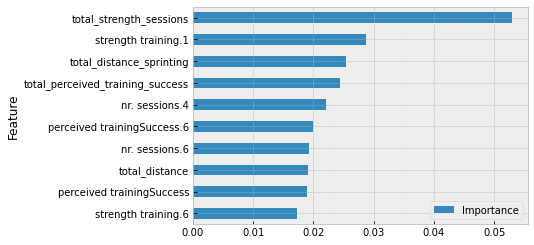

In [153]:
#plt.figure(figsize=(20,10))
top10_feat.set_index("Feature")[::-1].plot(kind="barh")
plt.show()